<a href="https://colab.research.google.com/github/calistojuupiter-collab/sic_ai_2025_sept/blob/main/3_machine_learning/contribuciones_estudiantes/Ejercicio_kaggle_recuperativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea recuperativa - Capitulo 5

[**Arboles de decision a partir de datasets de Kaggle**:](https://youtu.be/tIuLS31fEsw?si=s3JMSrot_fTM5MbM)

Se inicia desde kaggle.com con usuario y contrasena. Es una comunidad de Machine learning donde encontraremos datasets.

In [2]:
!pip install --upgrade --force-reinstall --no-deps kaggle # se instala kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.7.4.5
    Uninstalling kaggle-1.7.4.5:
      Successfully uninstalled kaggle-1.7.4.5


Para comunicarse con la API de kaggle se debe tener el token desde la pagina. Desde settings se puede crear un nuevo token.

In [3]:
from google.colab import files #subir archivo json desde el kaggle

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"calistojpiter","key":"88e1748bed654795698e6744cbddcad5"}'}

In [4]:
!mkdir -p ~/.kaggle #para setear la configuracion del kaggle, crea un directorio oculto
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle models list # ver todos los modelos que existen

Next Page Token = CfDJ8EjpvNnYgNtGoWS2kk3rGCINT08yQplu8g1CNln7Teercm4eR3PbrZxdr2gg5Hq-1KYj_E8Phj5BIEA-sxzpXBE
    id  ref                                  title                     subtitle                                                                                                                                                                                                                                                  author                   
------  -----------------------------------  ------------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  -----------------------  
446705  qwen-lm/qwen3-next-80b               Qwen3 Next 80B            Qwen3-Next-80B-A3B is the first installment in the Qwen3-Next series and features the following key enchancements like Hybrid

# Mobile Price Classification Dataset

*Este conjunto de datos proviene de Kaggle y está diseñado para problemas de clasificación supervisada.
El objetivo es predecir el rango de precio de un teléfono móvil basado en sus características técnicas.*

In [8]:
!kaggle datasets list -s mobile-price-classification # se ve el dataset "mobile-price-classification"

ref                                                               title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
iabhishekofficial/mobile-price-classification                     Mobile Price Classification                             72340  2018-01-28 08:44:24.237000         235464       2402  0.7058824        
jacksondivakarr/phone-classification-dataset                      Phone Classification Dataset                           210416  2023-12-12 15:21:07.330000           8225         91  1.0              
mbsoroush/mobile-price-range                                      Mobile Price Range                                      72340  2024-07-29 08:05:56.637000           2342         43  1.0          

In [9]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification # se descarga el dataset "mobile-price-classification"

Dataset URL: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
License(s): unknown
  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 224MB/s]


In [10]:
!unzip "/content/mobile-price-classification.zip" # se descomprime la descarga para ver el contenido

Archive:  /content/mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


Se descomprime el zip y se disponen de los archivos de entrenamiento y testeo "test.csv" y "train.csv"

# Analisis de datos

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

Aca se procede a explorar los datos en el dataset.

In [15]:
df_train.info() # obtener un resumen informativo del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [16]:
df_train.isnull().sum() # ver si existen datos faltantes

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [17]:
df_train.describe() # ver datos estadisticos del dataframe, nos sirve para ver la tendencia y presencia de outliers

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Aca se puede revisar la tendencia de los datos, su variabilidad, etc. Sin embargo su interpretacion se facilita graficando...


*   Se utilizan todas las columnas, por lo que se muestran tambien aquellas con variables dummies (0 a 1).
*   Se puede identificar outliers con un simbolo "o".





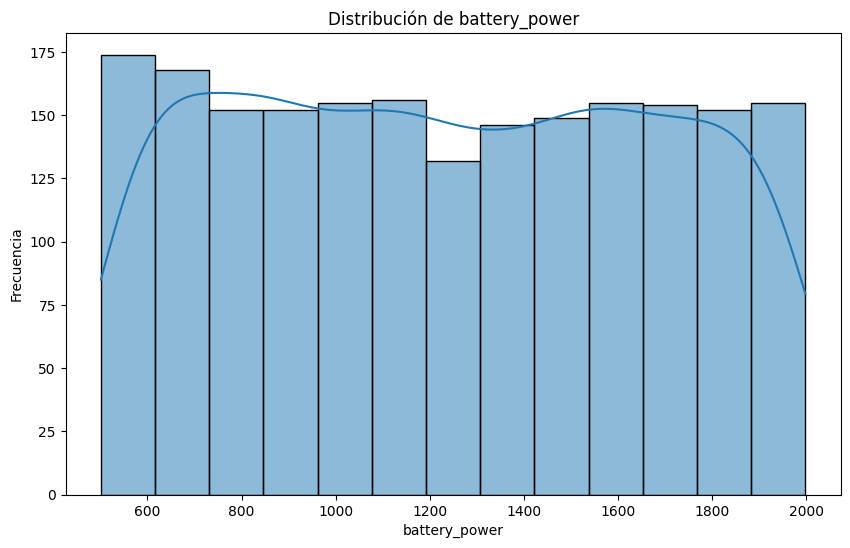

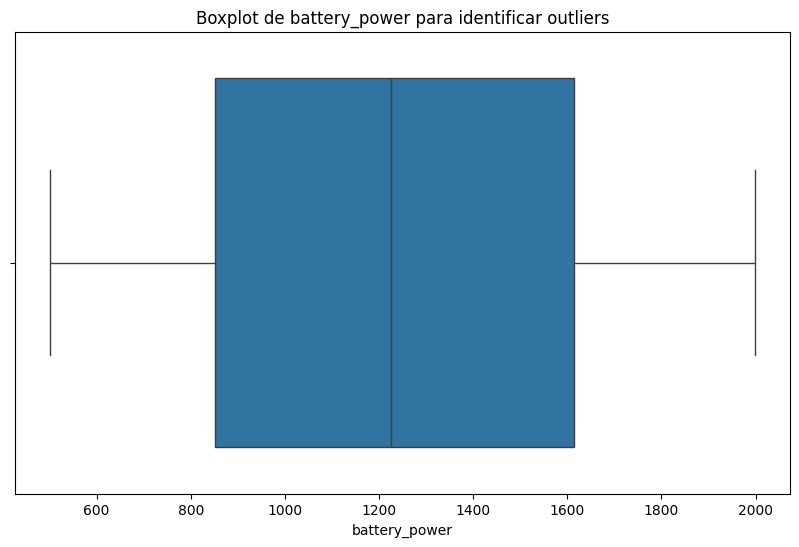

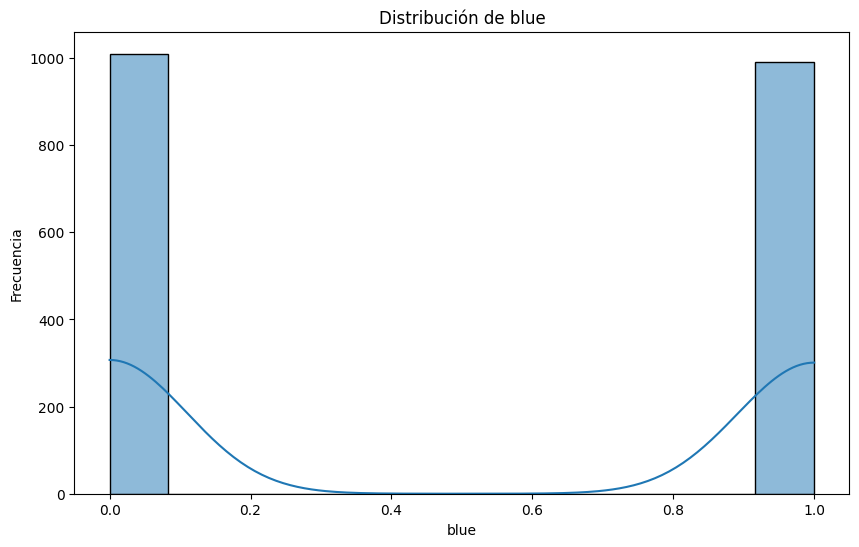

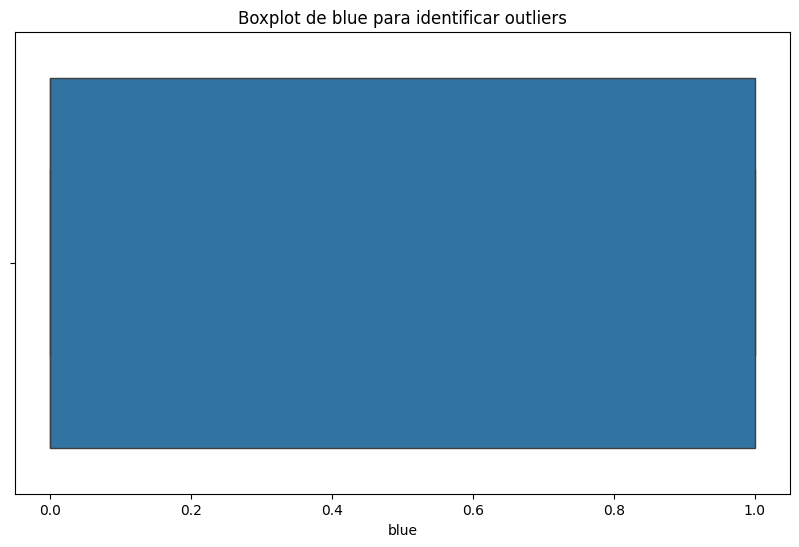

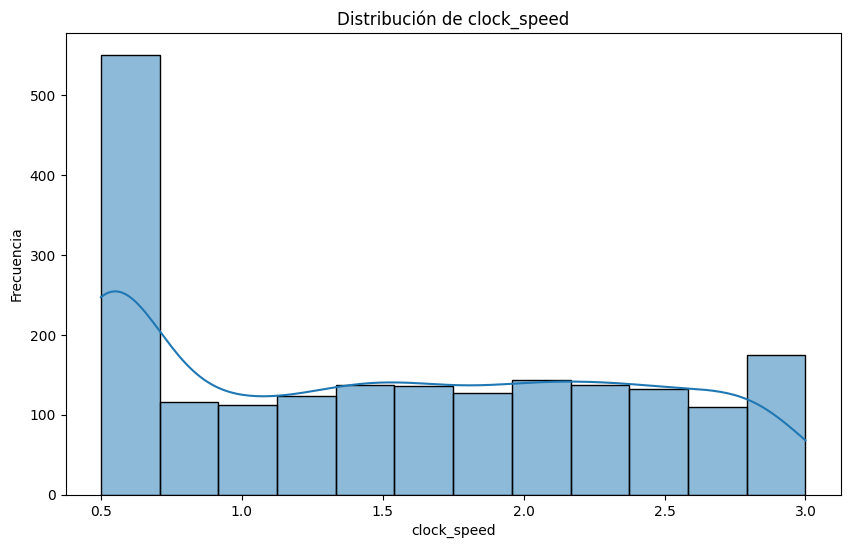

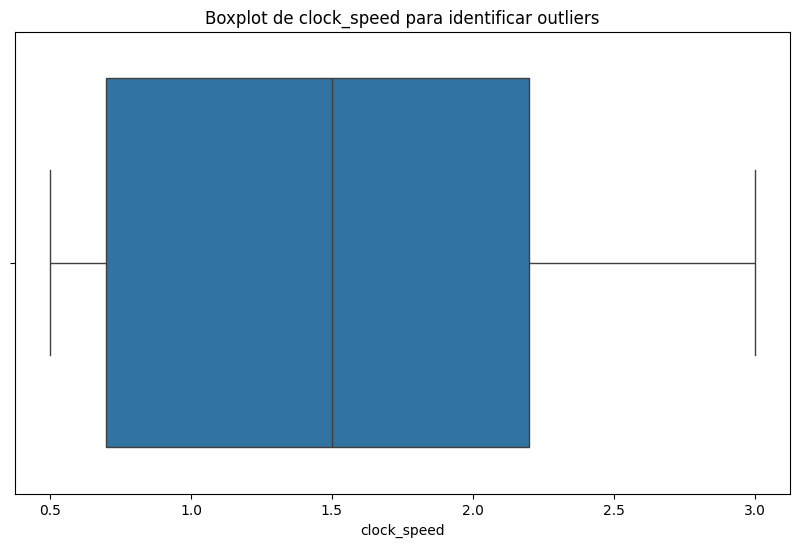

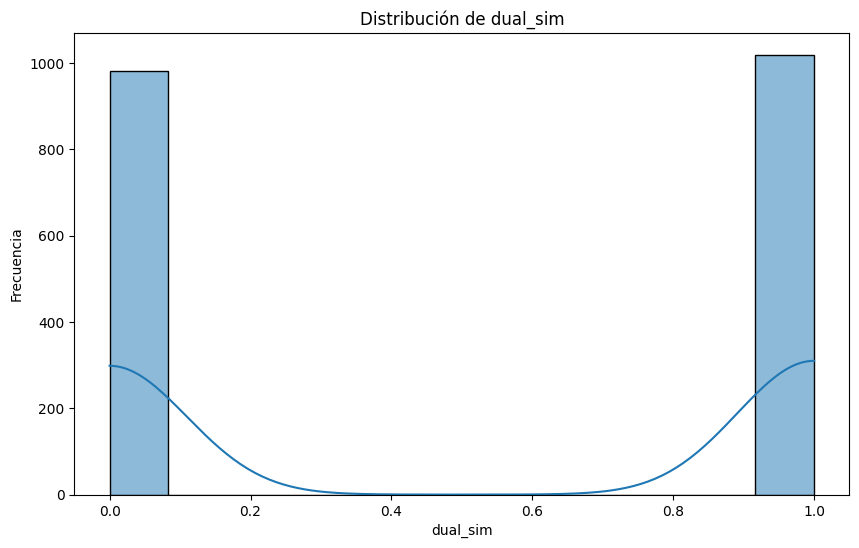

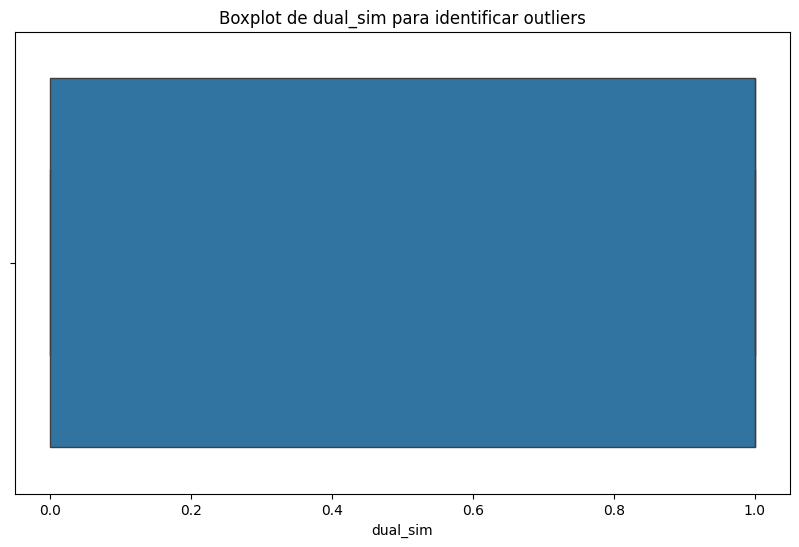

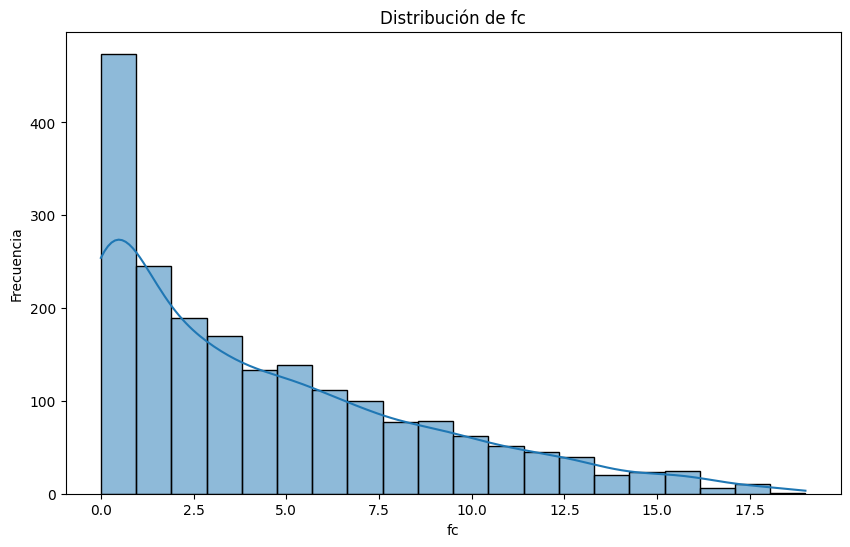

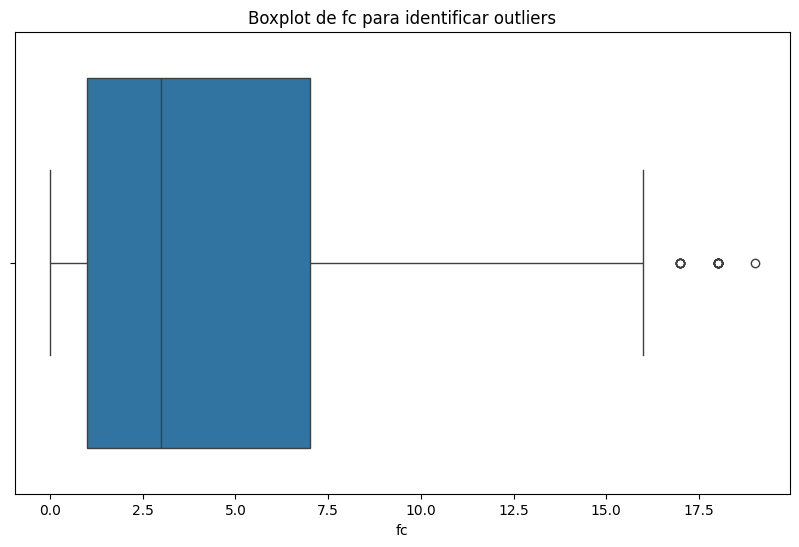

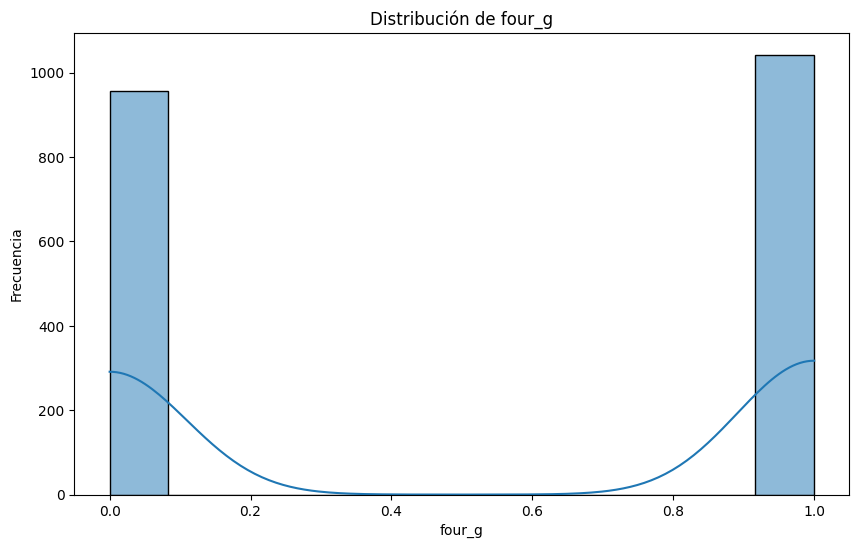

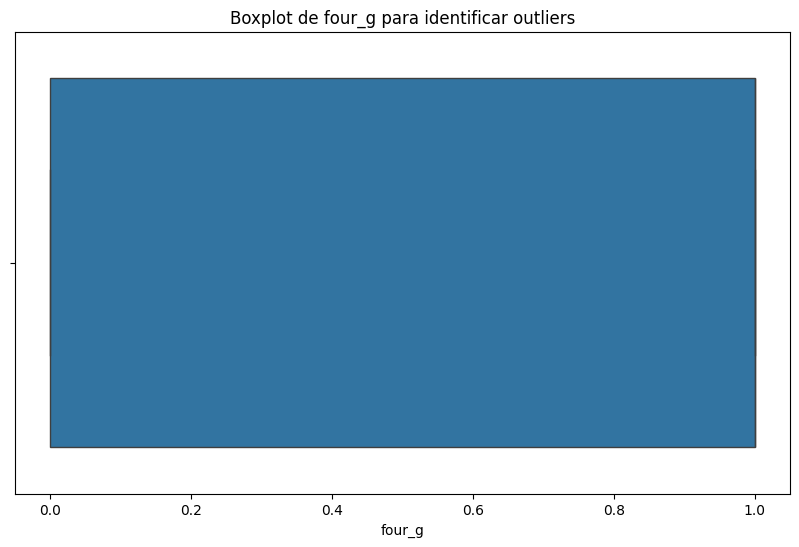

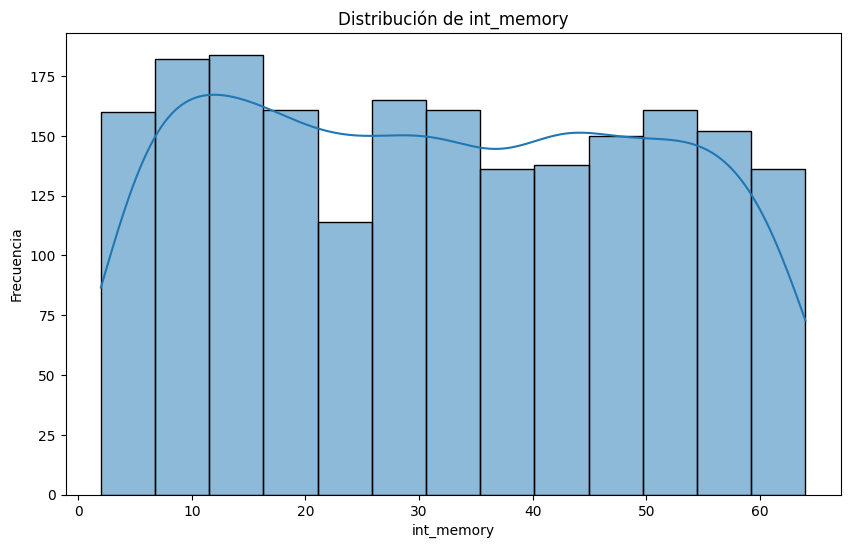

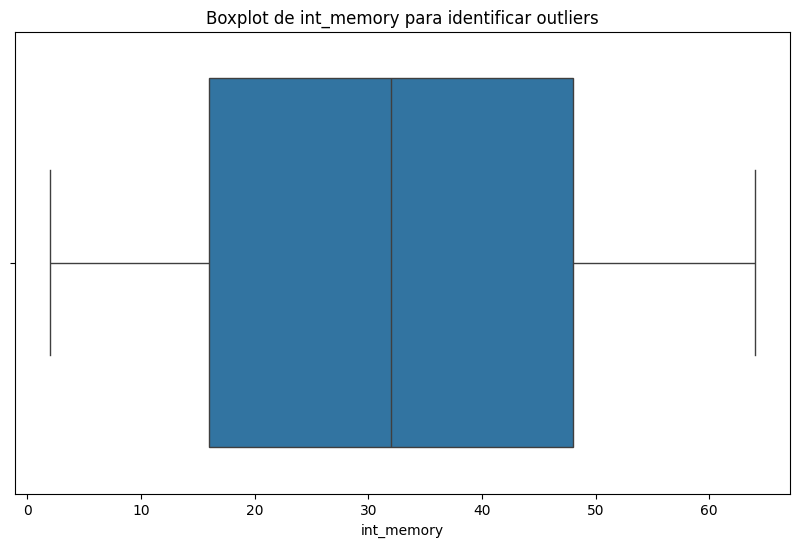

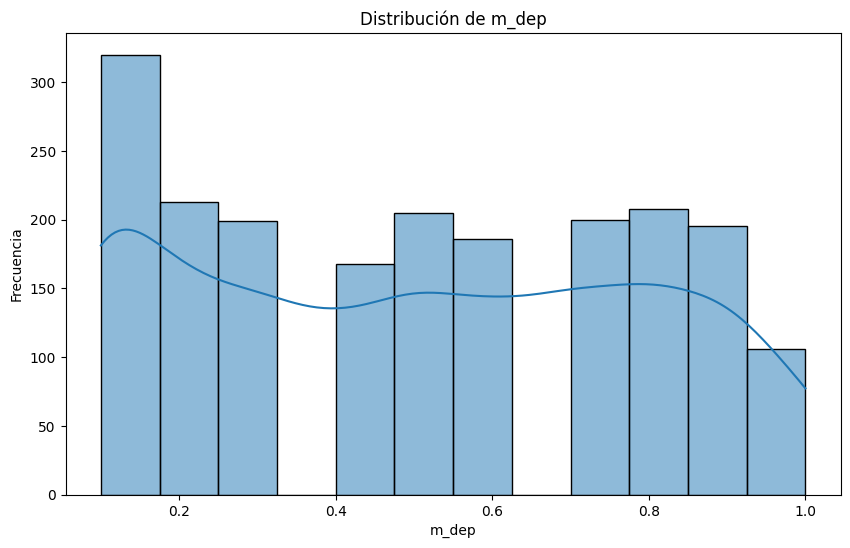

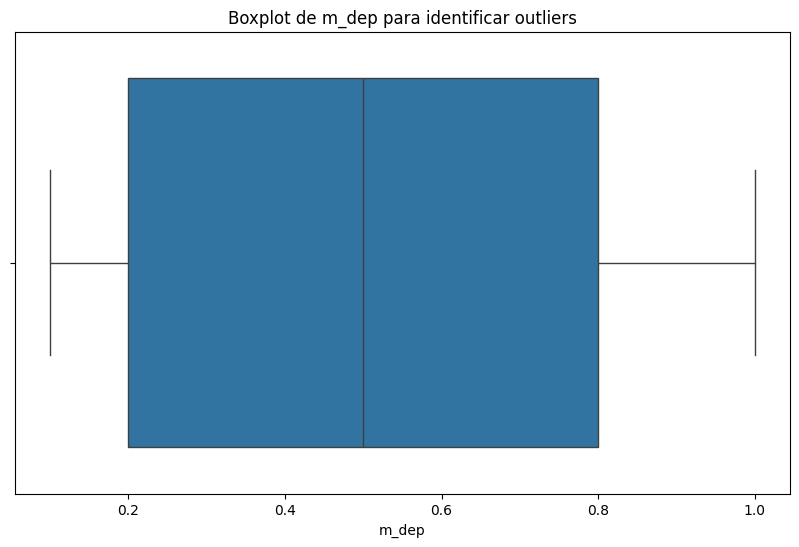

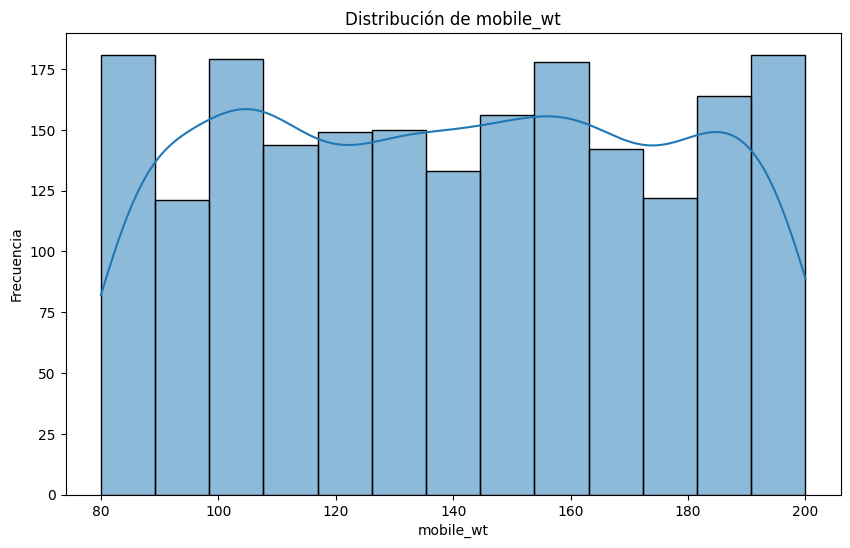

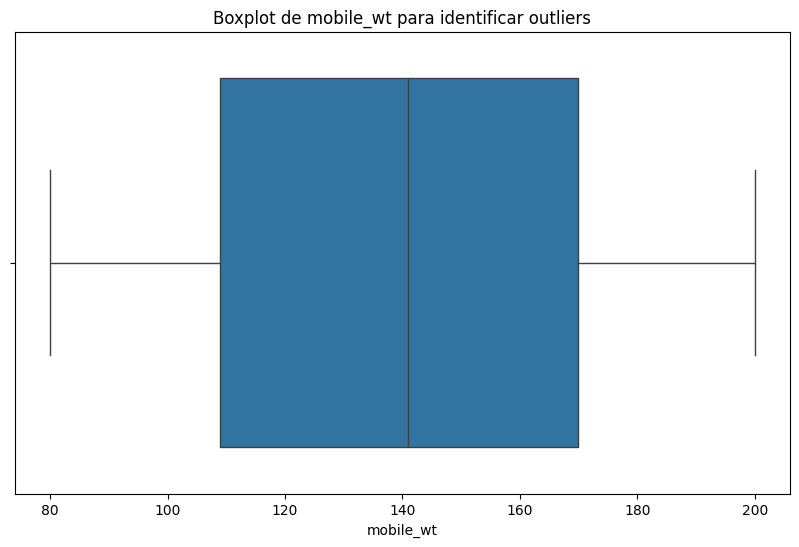

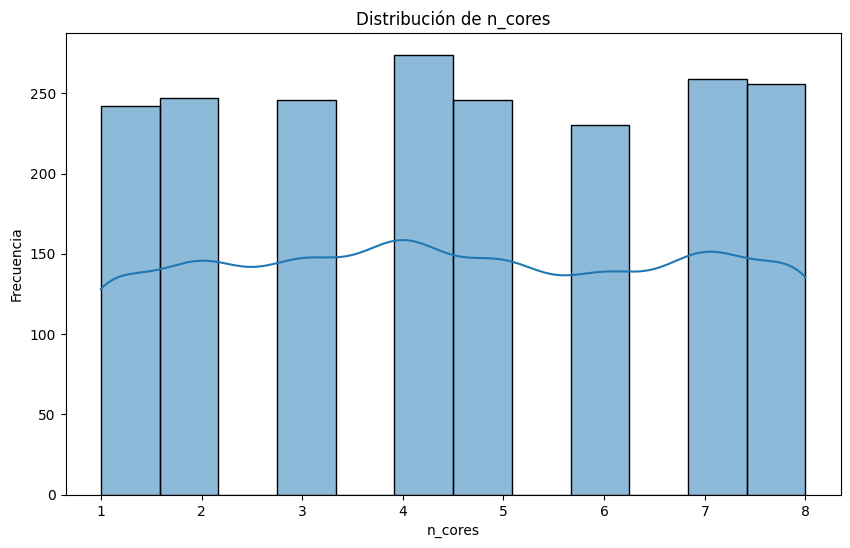

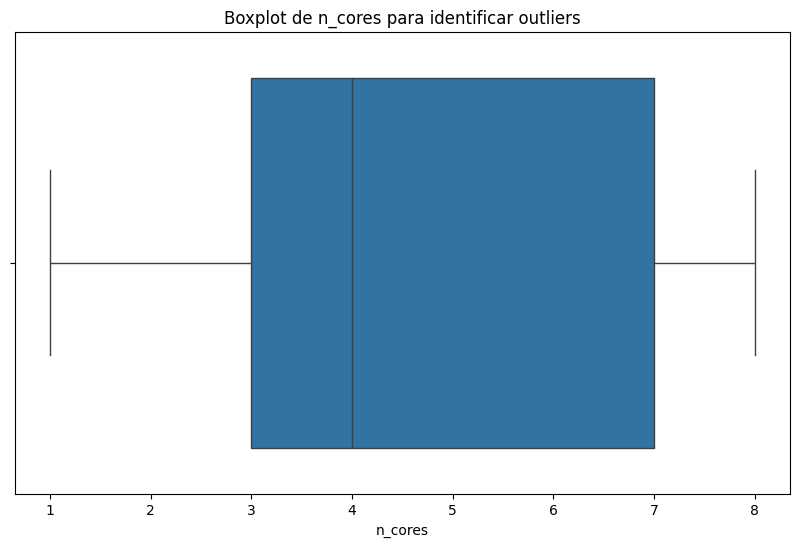

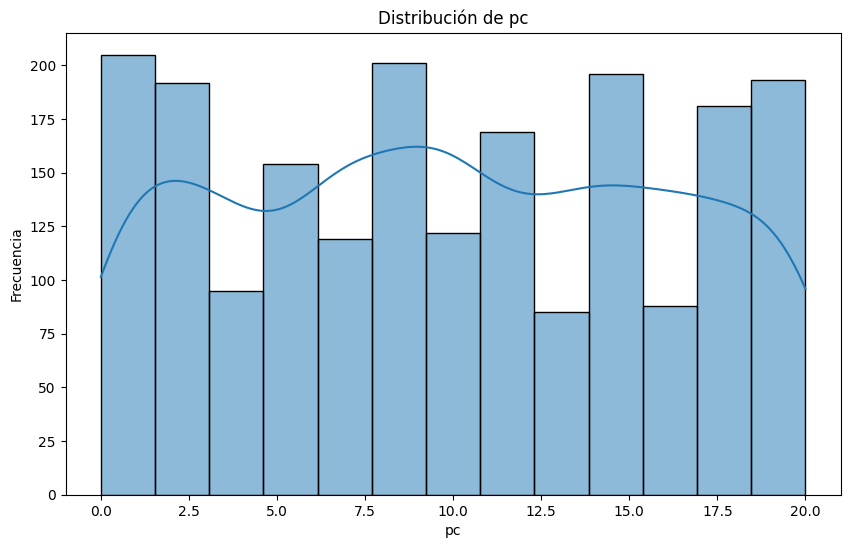

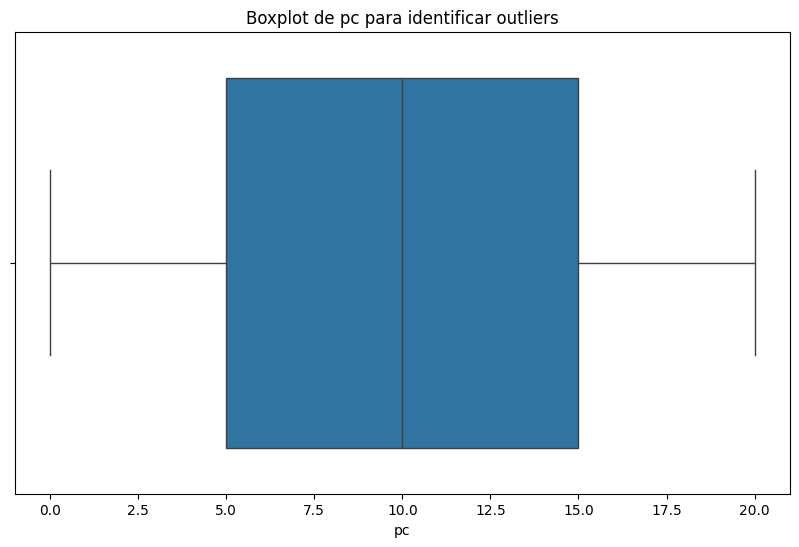

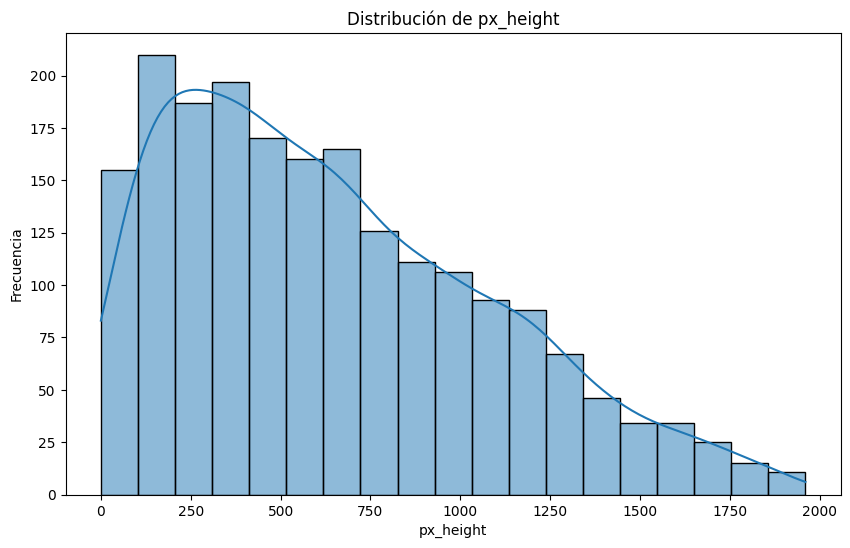

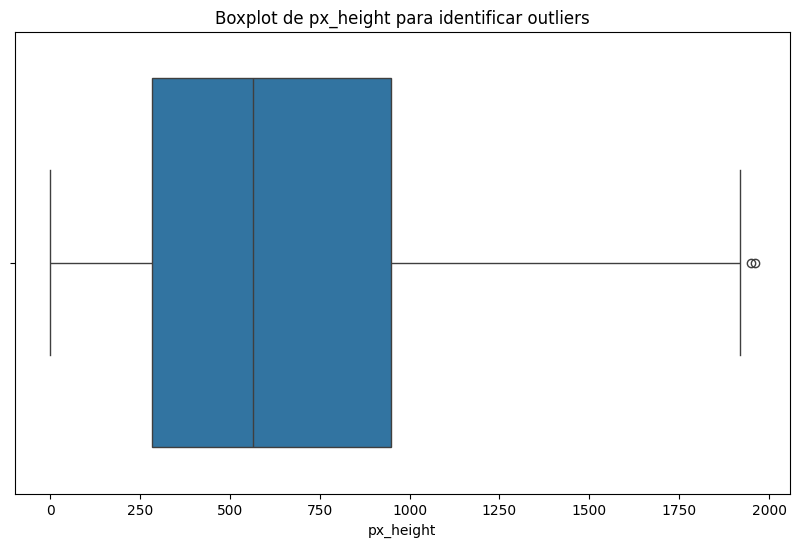

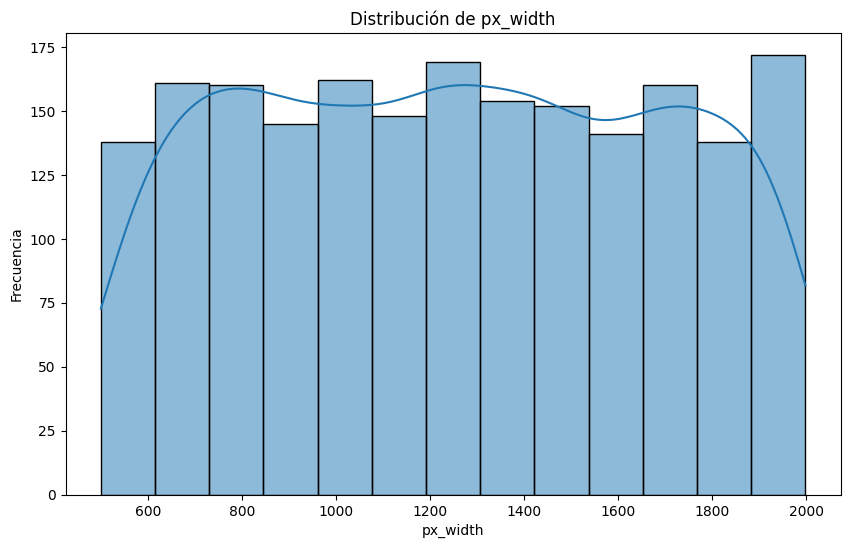

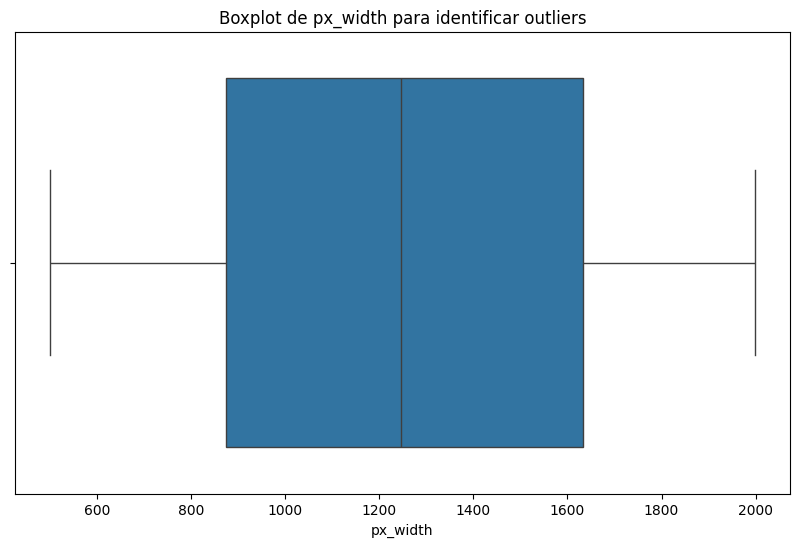

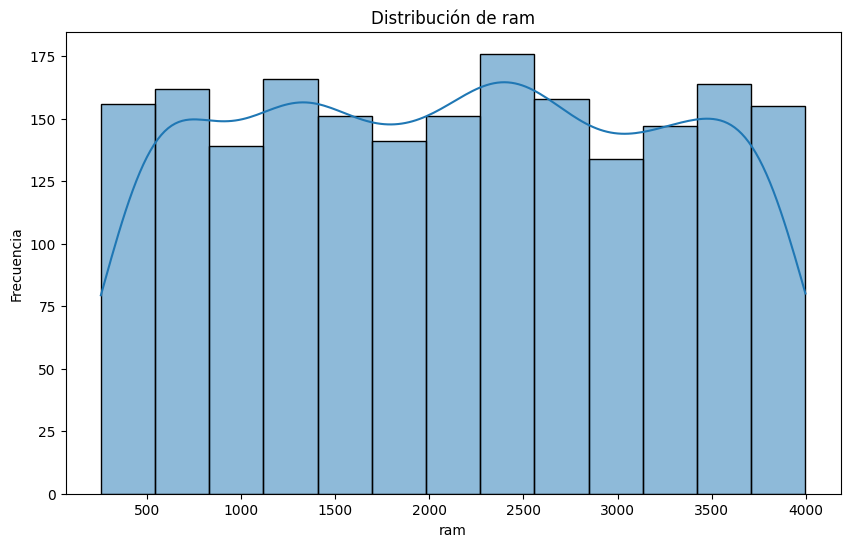

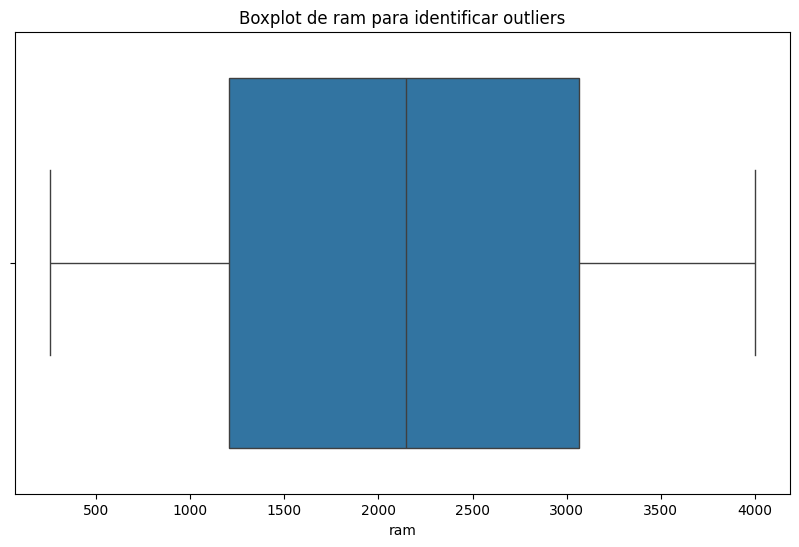

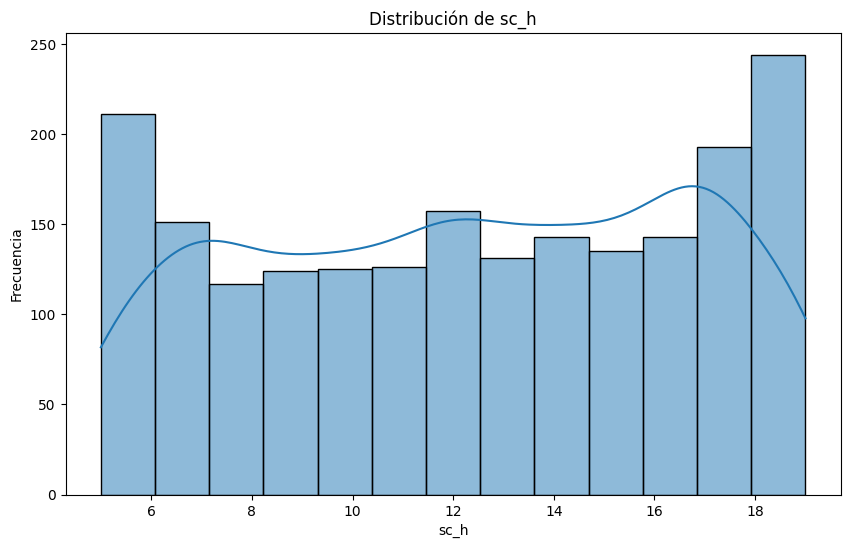

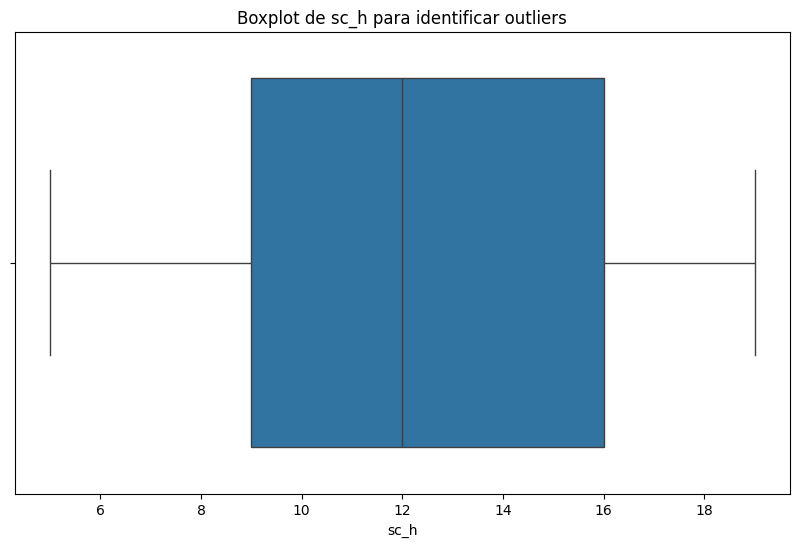

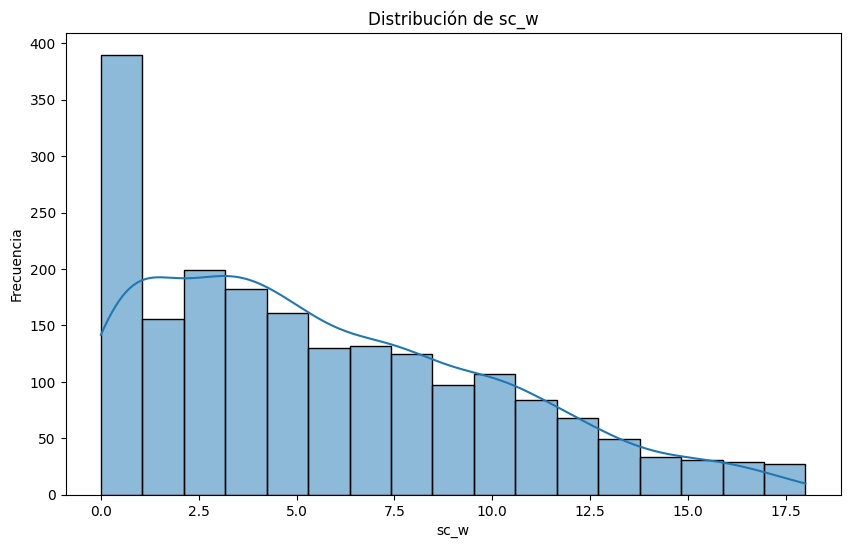

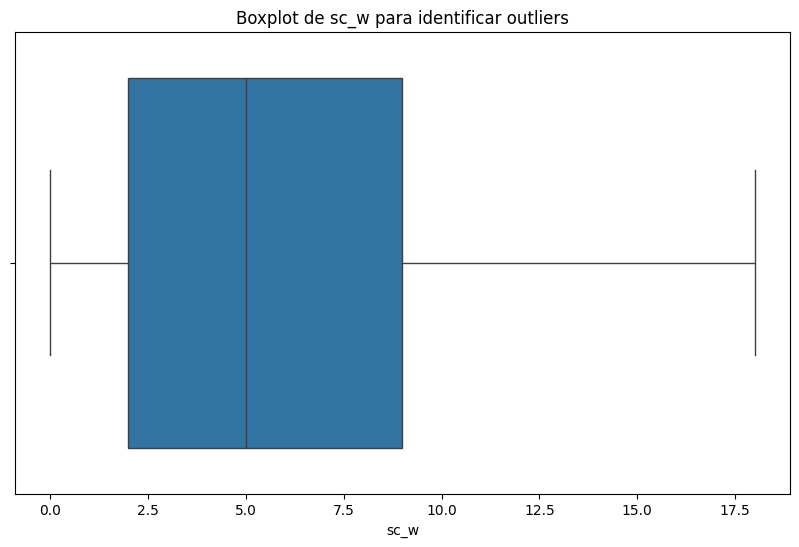

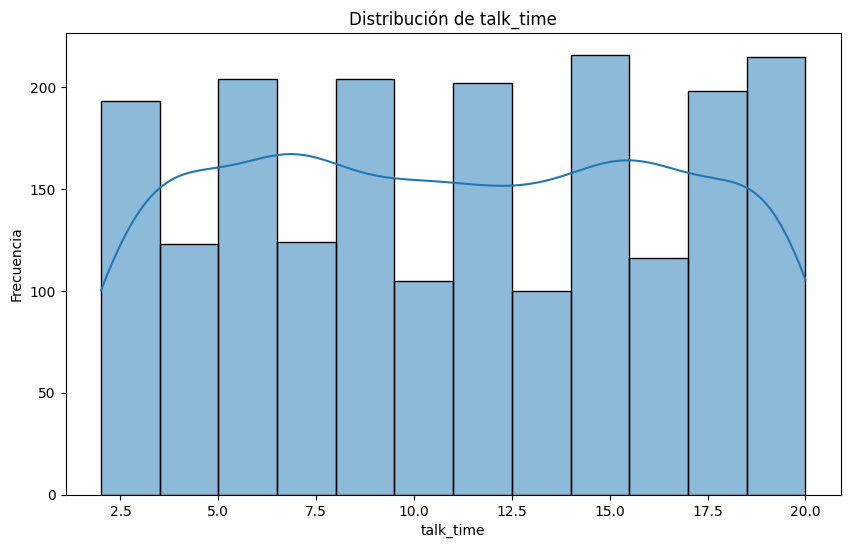

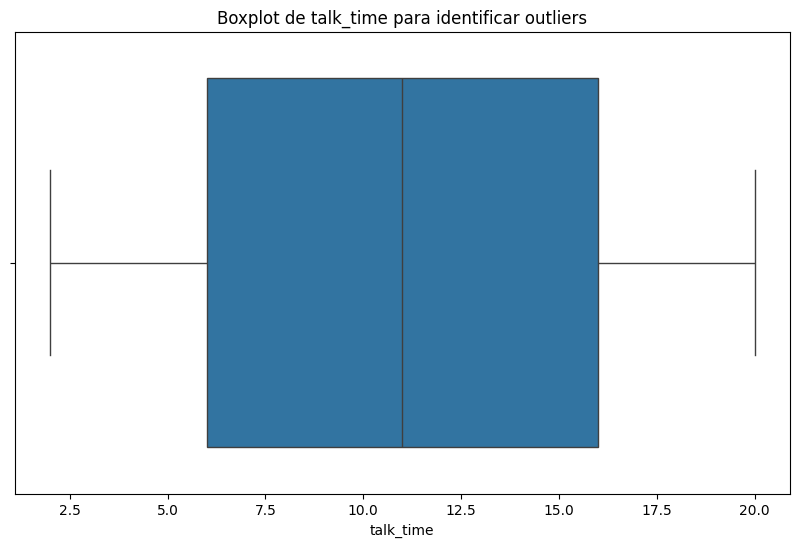

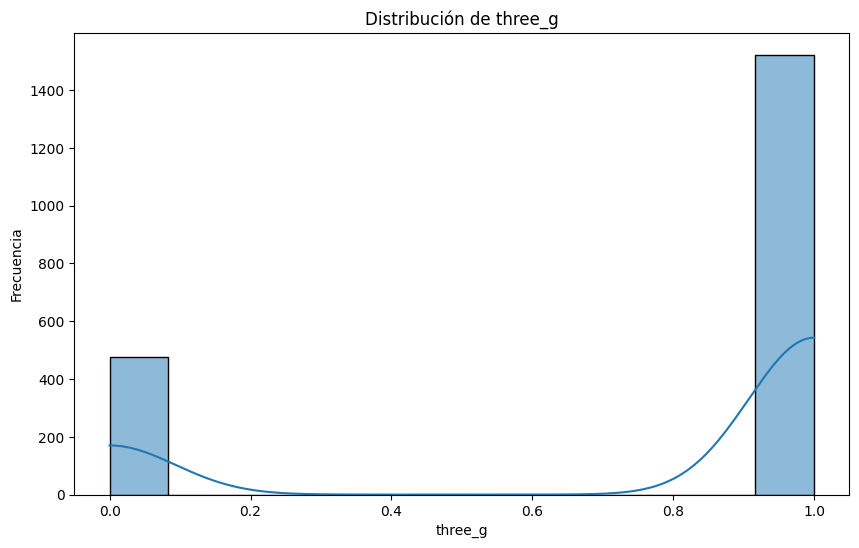

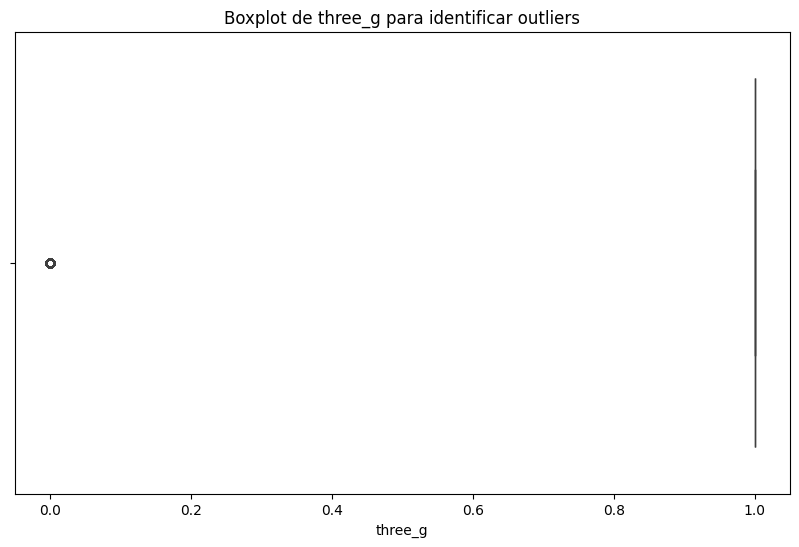

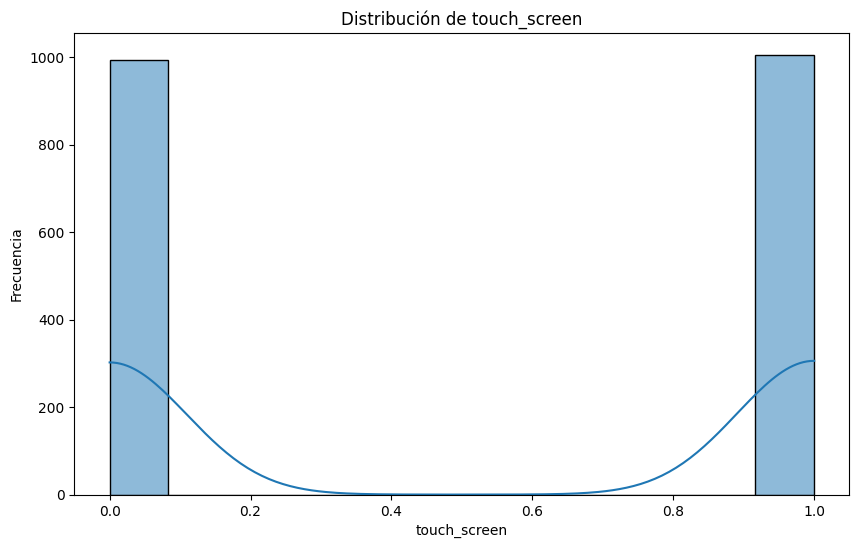

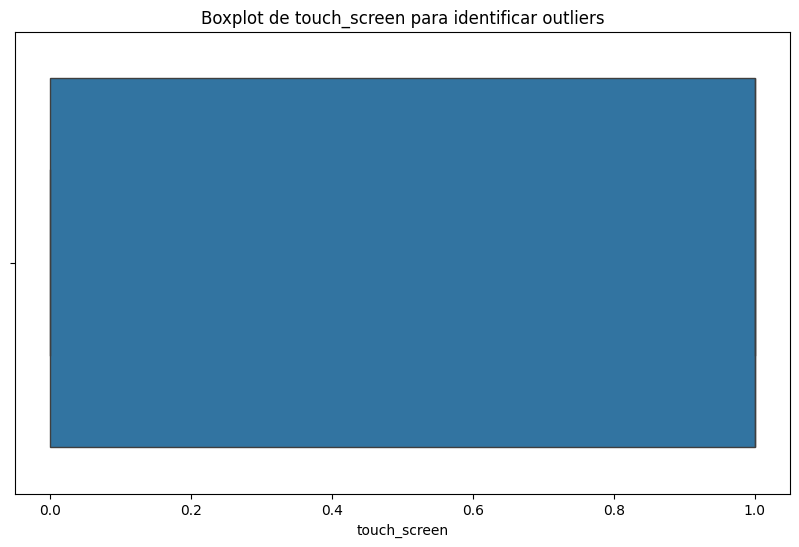

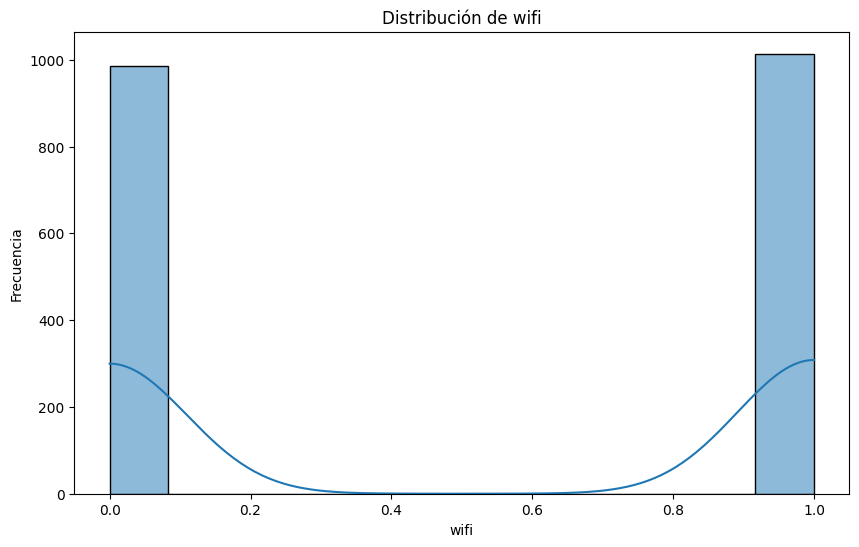

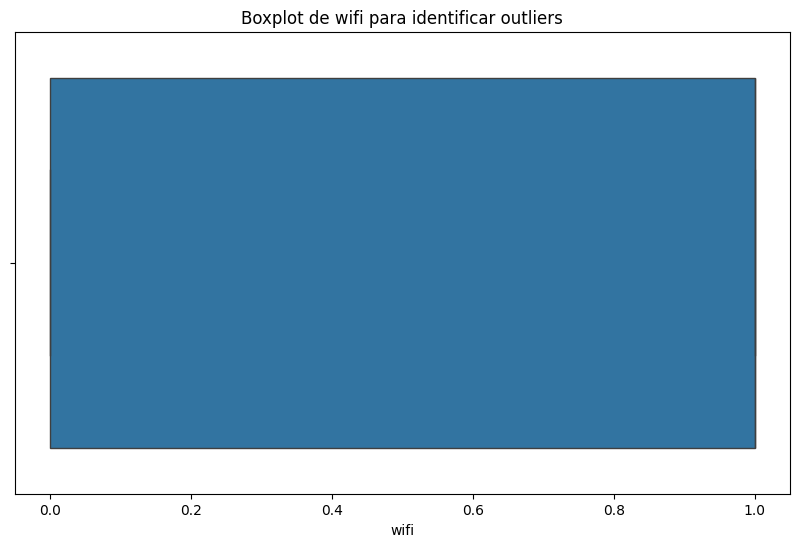

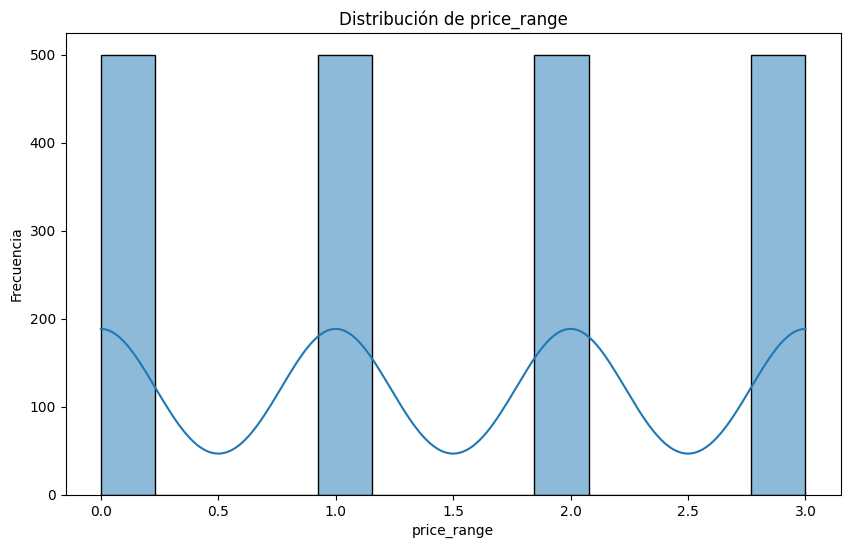

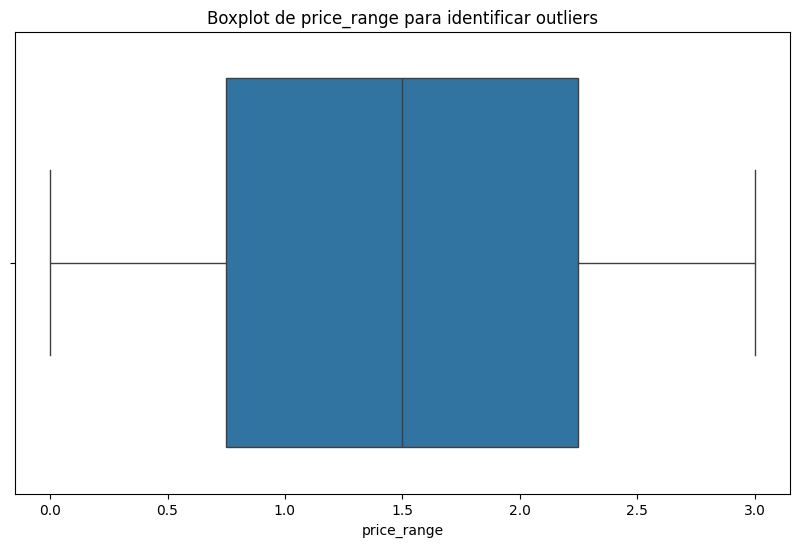

In [18]:
num_cols = df_train.select_dtypes(include=np.number).columns #se escogen las columnas de los datos de entrenamiento

for col in num_cols: # itera este proceso para cada clasificacion/columna ...
    plt.figure(figsize=(10, 6))
    sns.histplot(df_train[col], kde=True) #ploteo histograma
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_train[col]) #ploteo grafico boxplot/ de caja
    plt.title(f'Boxplot de {col} para identificar outliers')
    plt.xlabel(col)
    plt.show()

Aca...

In [20]:
df_train.corr() # para ver datos correlacionados

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


Para visualizar mejor las columnas correlacionadas, se grafican aquellas numericas en una matriz de correlacion.

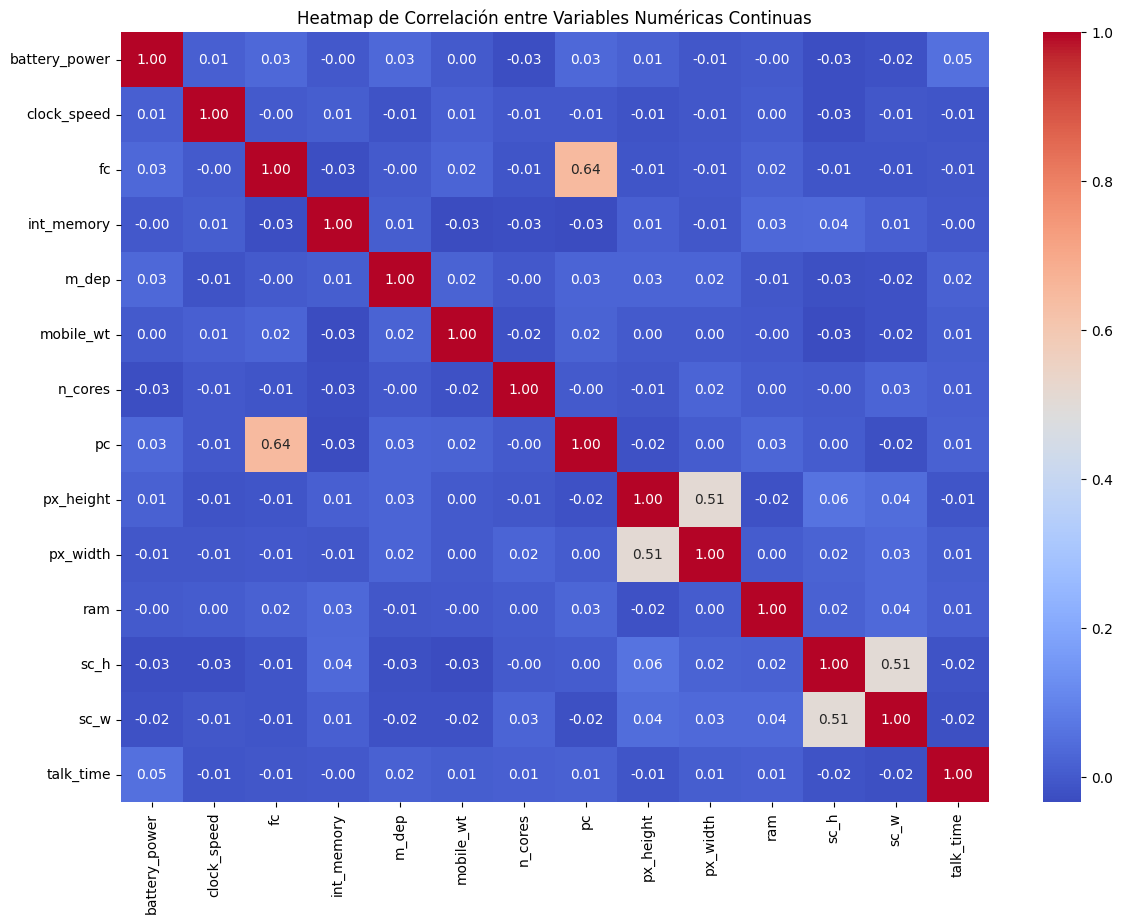

In [21]:
# Excluir las columnas binarias (dummies)
dummy_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range'] # se identificaron las columnas dummies
numeric_cols = [col for col in df_train.columns if col not in dummy_cols]

# Crear un DataFrame solo con las columnas numéricas continuas
df_numeric = df_train[numeric_cols]

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Visualizar el heatmap con los valores de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación entre Variables Numéricas Continuas')
plt.show()

Se puede interpretar de la matriz ....
*   **fc y pc**: correlación positiva fuerte (0.64). Teléfonos con mejor cámara principal tienden a tener mejor cámara frontal.

*   **px_height y px_width**: correlación moderada (0.51). Ambas dimensiones de la pantalla crecen juntas.

*   **sc_h y sc_w**: correlación moderada (0.51). Alto y ancho de la pantalla están relacionados.

*   *El resto de variables* (battery_power, clock_speed, int_memory, m_dep, mobile_wt, n_cores, ram, talk_time) muestran correlaciones cercanas a 0, indicando no dependencia.

# Normalizacion de datos

In [31]:
from sklearn.preprocessing import MinMaxScaler # se usa el tipo de escalamiento "minmaxscaler" entre los demas scalers ...

# Excluir las columnas binarias (dummies)
dummy_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
numeric_cols = [col for col in df_train.columns if col not in dummy_cols]

# Crear un DataFrame solo con las columnas numéricas continuas
df_numeric = df_train[numeric_cols]

# Aplicar MinMaxScaler a las columnas numéricas continuas
scaler = MinMaxScaler()
df_train_scaled = df_train.copy()
df_train_scaled[numeric_cols] = scaler.fit_transform(df_numeric)

# Mostrar las primeras filas del DataFrame escalado para verificar
display(df_train_scaled.head())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0,0.68,0,0.052632,0,0.080645,0.555556,0.900000,0.142857,...,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0,0,1,1
1,0.347361,1,0.00,1,0.000000,1,0.822581,0.666667,0.466667,0.285714,...,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1,1,0,2
2,0.041416,1,0.00,1,0.105263,1,0.629032,0.888889,0.541667,0.571429,...,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1,1,0,2
3,0.076152,1,0.80,0,0.000000,0,0.129032,0.777778,0.425000,0.714286,...,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1,0,0,2
4,0.881764,1,0.28,0,0.684211,1,0.677419,0.555556,0.508333,0.142857,...,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1,1,0,1


Convertir variables categoricas en variable binaria o dummy.

In [32]:
df_train_scaled['price_binary'] = df_train_scaled['price_range'].apply(lambda x: 0 if x <= 1 else 1) # variable normalizada se transforma a binaria ...
display(df_train_scaled[['price_range', 'price_binary']].head())

print("Frecuencia de valores únicos en 'price_range':")
display(df_train['price_range'].value_counts())

print("\nFrecuencia de valores únicos en 'price_binary':")
display(df_train['price_binary'].value_counts())

,price_range,price_binary
0,1,0
1,2,1
2,2,1
3,2,1
4,1,0


Frecuencia de valores únicos en 'price_range':


,count
price_range,
1,500
2,500
3,500
0,500



Frecuencia de valores únicos en 'price_binary':


KeyError: 'price_binary'

In [25]:
df_test.head() # ver datos de testeo no normalizados, se ocupa para validar el modelo

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


# Split

Hacer una division/split de datos


In [36]:
from sklearn.model_selection import train_test_split

X = df_train_scaled.drop(['price_range', 'price_binary'], axis=1)
y = df_train_scaled['price_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar modelo

Instanciar modelo de arbol "tree clasifier"

In [37]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metricas

Importar metricas para posterior validacion del modelo

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       196
           1       0.96      0.94      0.95       204

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [39]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9475


In [40]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_accuracy}")

Balanced Accuracy: 0.9476290516206483


*   Accuracy Score indica la precisión general del modelo.
*   Balanced Accuracy indica la precisión considerando el balance entre clases (evita sesgo con datos desbalanceados)



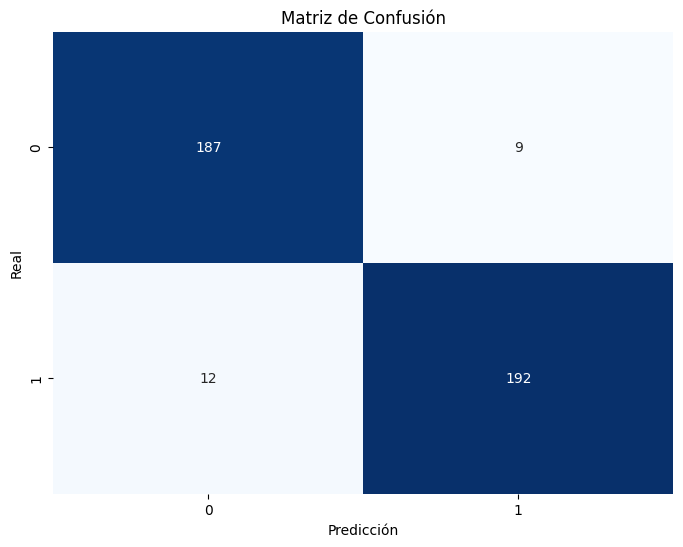

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# Diagrama de arbol de decision

*Este toma decisiones dividiendo los datos en ramas según condiciones en las variables, formando un esquema jerárquico tipo árbol hasta llegar a una predicción en las hojas.*
*   Las condiciones se generan automáticamente a partir de los datos.
*   El algoritmo busca en cada variable el umbral que mejor separa las clases o reduce el error.

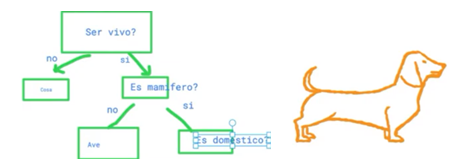

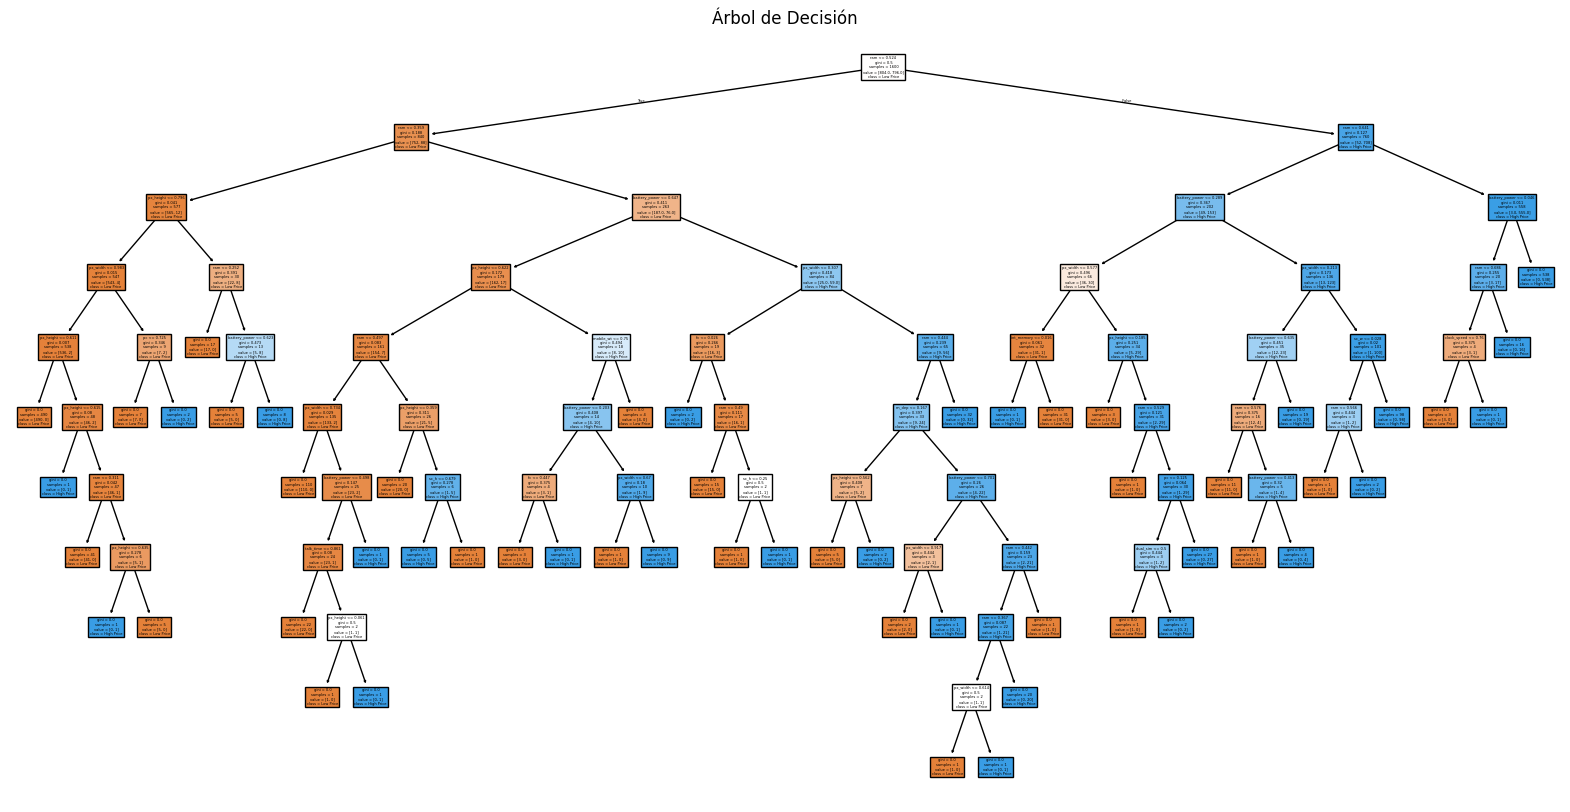

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Low Price', 'High Price'], filled=True)
plt.title("Árbol de Decisión")
plt.show()

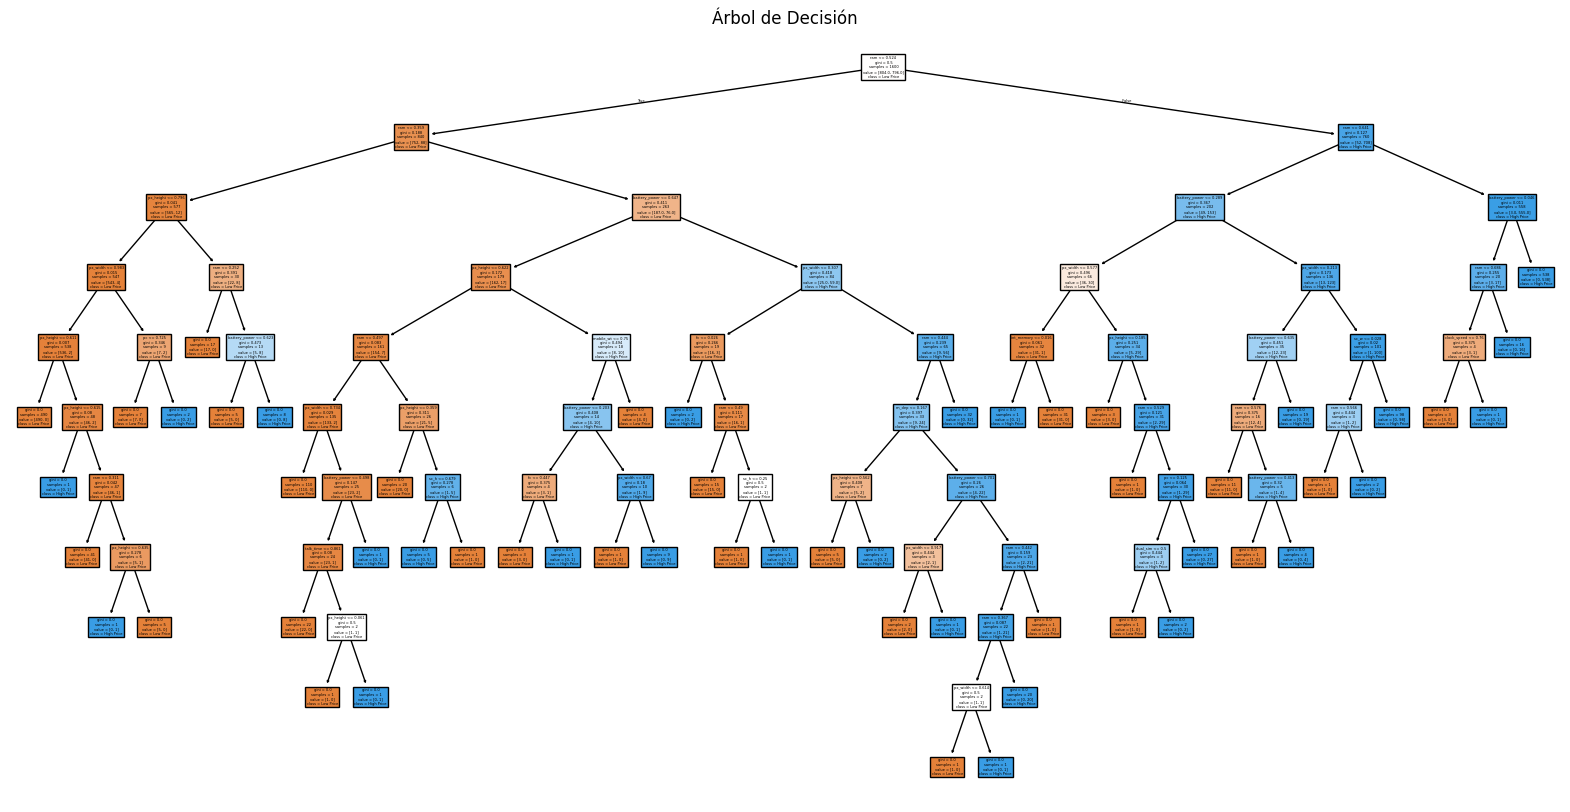

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Low Price', 'High Price'], filled=True)
plt.title("Árbol de Decisión")
plt.savefig("decision_tree.png", dpi=300, bbox_inches='tight')
plt.show()

# Curva de aprendizaje

Es un gráfico que muestra cómo mejora el desempeño de un modelo a medida que aumenta la cantidad de datos de entrenamiento. Sirve para detectar si el modelo sufre de sobreajuste (overfitting) o subajuste (underfitting).


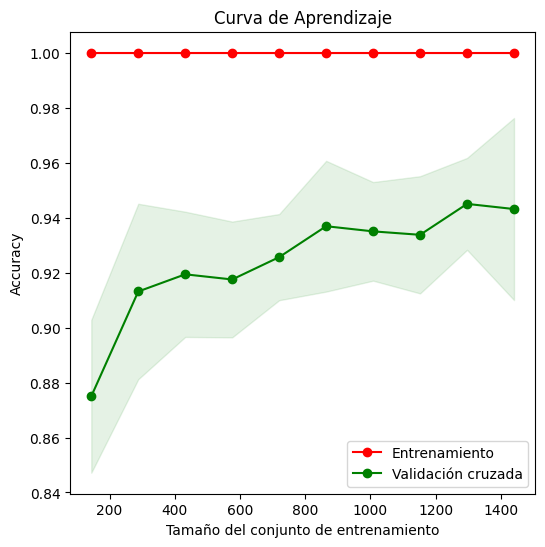

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Generar curvas de aprendizaje directamente con scikit-learn
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=10,               # validación cruzada (puedes cambiar a 3 o 10)
    n_jobs=-1,          # usar todos los núcleos
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy"  # métrica, cámbiala si quieres
)

# Promedios y desviaciones
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

# Graficar
plt.figure(figsize=(6,6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")

# Área sombreada (desviación estándar)
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1, color="g")

# Líneas promedio
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación cruzada")

plt.legend(loc="best")
plt.show()

El gráfico muestra que alrededor de 600 datos la exactitud de validación disminuye aunque después mejora gradualmente hasta acercarse a un 94% con un mayor número de muestras. De igual manera, mejora su porcentaje de exactitud tras 1200 muestras.

# Hiperparametros del arbol de decision

a

# GridsearchCV del arbol

*Es un método que prueba de forma sistemática distintas combinaciones de hiperparámetros de un árbol de decisión (por ejemplo, max_depth, min_samples_split, criterion), evaluando cada combinación con validación cruzada (CV), para elegir la que da mejor rendimiento promedio.*

In [51]:
from sklearn.model_selection import GridSearchCV


# Diccionario de hiperparámetros a probar
# Elegí rangos razonables para tu dataset (2000 muestras, ~20 features).
# Puedes ajustar si quieres más/menos combinaciones (esto genera ~1000 fits con cv=5, toma tiempo pero es manejable).
param_grid = {
    'criterion': ['gini', 'entropy'],  # Métricas de impureza
    'max_depth': [None, 3, 5, 10],  # Profundidad máxima para controlar overfitting
    'min_samples_split': [2, 5, 10],    # Mínimo muestras para split
    'min_samples_leaf': [1, 2, 4],      # Mínimo muestras en hoja
    'max_features': [None, 'sqrt', 'log2'],  # Número de features por split
    'class_weight': [None, 'balanced']  # Para manejar posible desbalance
}

In [53]:
# Configuramos GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

In [54]:
# Ajustamos el modelo con GridSearchCV (esto puede tomar unos minutos)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [55]:
# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [56]:
# Mejor score en validación cruzada
print(f"Mejor accuracy en validación cruzada: {grid_search.best_score_:.4f}")

Mejor accuracy en validación cruzada: 0.9531


In [57]:
# Usamos el mejor modelo para predecir en test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [58]:
# Evaluamos el mejor modelo
print("\nReporte de clasificación con el mejor modelo:")
print(classification_report(y_test, y_pred))


Reporte de clasificación con el mejor modelo:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       196
           1       0.96      0.94      0.95       204

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



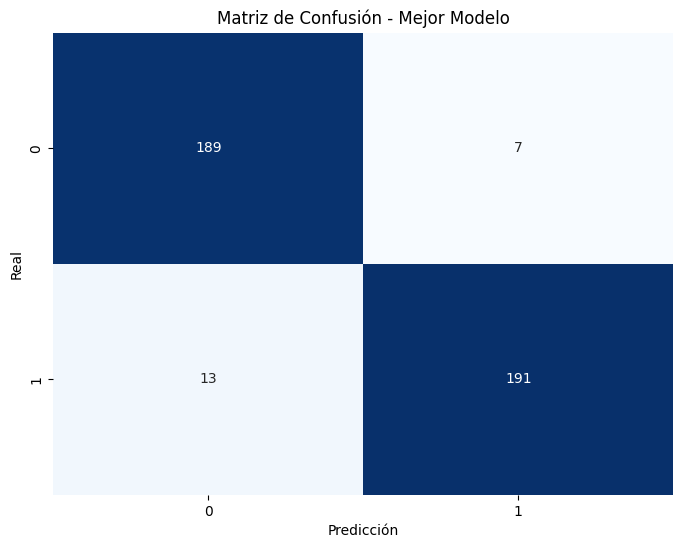

In [59]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Mejor Modelo")
plt.show()

In [60]:
# Accuracy y Balanced Accuracy
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy en test: {accuracy:.4f}")
print(f"Balanced Accuracy en test: {balanced_accuracy:.4f}")

Accuracy en test: 0.9500
Balanced Accuracy en test: 0.9503


El modelo mejoró alrededor de un 1.6% respecto al anterior tras el ajuste de mejores hiperparametros.

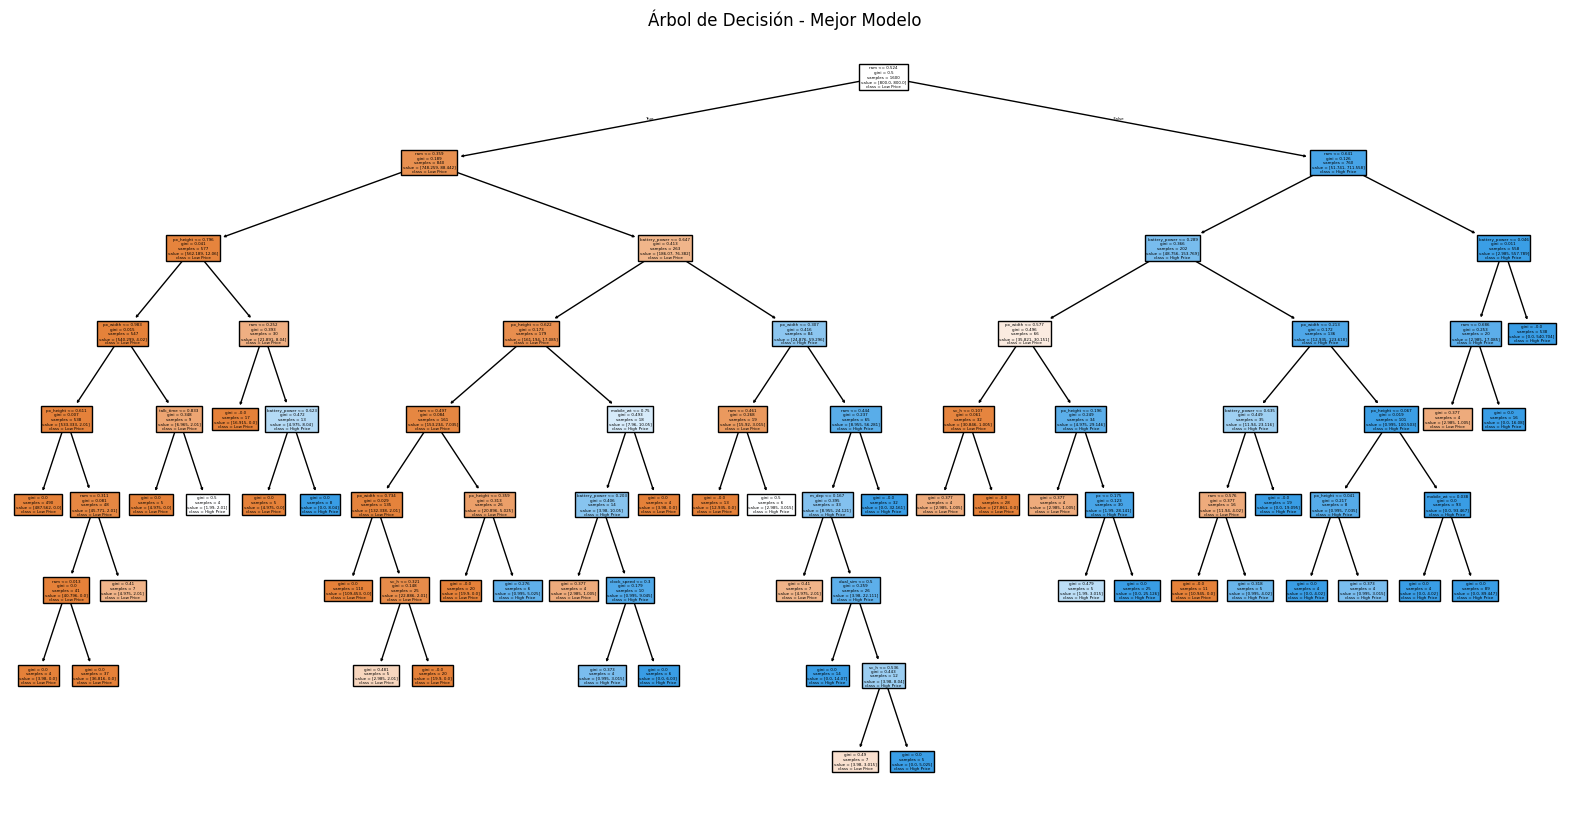

In [61]:
# Visualizamos el árbol del mejor modelo
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=['Low Price', 'High Price'], filled=True)
plt.title("Árbol de Decisión - Mejor Modelo")
plt.show()

# Ejemplo interactivo de aplicacion

In [63]:
import pickle

# Guardar el modelo entrenado
with open("tree_model_first.pkl", "wb") as f:
    pickle.dump(model, f)

In [64]:
import pickle

# Guardar el mejor modelo entrenado
with open("tree_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

El código implementa un programa interactivo que carga un modelo entrenado y un conjunto de datos, permite al usuario ingresar el identificador de un registro y devuelve la predicción del modelo para ese caso. El usuario ingresa el numero del modelo (0,1,...) e indica si es **caro** o **barato**.

In [65]:
import pandas as pd
import pickle

# Cargar modelo entrenado
with open("tree_model.pkl", "rb") as f:
    model = pickle.load(f)

# Cargar test.csv
test = pd.read_csv("test.csv")

# Crear un diccionario para acceder rápido por id
test_indexed = test.set_index('id')

# Programa interactivo
while True:
    try:
        user_input = input("Ingresa el ID del móvil (o 'salir' para terminar): ")
        if user_input.lower() == 'salir':
            print("Programa terminado.")
            break

        mobile_id = int(user_input)

        if mobile_id not in test_indexed.index:
            print("ID no encontrado. Intenta de nuevo.")
            continue

        # Tomar los datos del móvil y eliminar columnas que no usamos
        X_mobile = test_indexed.loc[[mobile_id]].drop(columns=[])

        # Predecir
        pred = model.predict(X_mobile)[0]

        # Mostrar resultado
        clase = "Barato" if pred == 0 else "Caro"
        print(f"El móvil con ID {mobile_id} se clasifica como: {clase}\n")

    except ValueError:
        print("Entrada no válida. Ingresa un número de ID.")



Ingresa el ID del móvil (o 'salir' para terminar): 1
El móvil con ID 1 se clasifica como: Caro

Ingresa el ID del móvil (o 'salir' para terminar): 2
El móvil con ID 2 se clasifica como: Caro

Ingresa el ID del móvil (o 'salir' para terminar): 8
El móvil con ID 8 se clasifica como: Caro

Ingresa el ID del móvil (o 'salir' para terminar): 20
El móvil con ID 20 se clasifica como: Caro

Ingresa el ID del móvil (o 'salir' para terminar): salir
Programa terminado.


Realiza las iteraciones y predicciones con dos modelos segun lo indique el usuario.

In [67]:
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler

# Cargar test.csv
test = pd.read_csv("test.csv")

# Crear un diccionario para acceder rápido por id
test_indexed = test.set_index('id')

# Inicializar el escalador (asumimos que los datos numéricos fueron escalados con MinMaxScaler en el entrenamiento)
numeric_cols = [col for col in test.columns if col not in ['id', 'price_range', 'price_binary']]  # Excluir columnas no numéricas o target
scaler = MinMaxScaler()
scaler.fit(test[numeric_cols])  # Ajustamos con los datos de test (idealmente usa datos de entrenamiento)

# Programa interactivo
while True:
    # Selección del modelo al inicio o después de salir
    model_choice = input("Elige el modelo (1 para tree_model_first.pkl, 2 para tree_model.pkl, o 'salir' para terminar): ")
    if model_choice.lower() == 'salir':
        print("Programa terminado.")
        break

    if model_choice not in ['1', '2']:
        print("Opción no válida. Elige 1, 2 o 'salir'.")
        continue

    # Cargar el modelo seleccionado
    model_file = "tree_model_first.pkl" if model_choice == '1' else "tree_model.pkl"
    try:
        with open(model_file, "rb") as f:
            model = pickle.load(f)
    except FileNotFoundError:
        print(f"Error: El archivo {model_file} no se encontró. Verifica los nombres de los archivos.")
        continue
    except Exception as e:
        print(f"Error al cargar el modelo: {e}. Intenta de nuevo.")
        continue

    print(f"Modelo {model_file} cargado exitosamente.\n")

    while True:  # Bucle interno para predicciones con el modelo elegido
        try:
            user_input = input("Ingresa el ID del móvil (o 'cambiar' para cambiar de modelo, o 'salir' para terminar): ")
            if user_input.lower() == 'salir':
                print("Programa terminado.")
                break
            elif user_input.lower() == 'cambiar':
                print("Volviendo al menú de selección de modelo...\n")
                break

            mobile_id = int(user_input)

            if mobile_id not in test_indexed.index:
                print("ID no encontrado. Intenta de nuevo.")
                continue

            # Tomar los datos del móvil
            X_mobile = test_indexed.loc[[mobile_id]].copy()

            # Escalar las columnas numéricas
            X_mobile[numeric_cols] = scaler.transform(X_mobile[numeric_cols])

            # Predecir
            pred = model.predict(X_mobile)[0]
            proba = model.predict_proba(X_mobile)[0]  # Probabilidades de cada clase

            # Calcular nivel de confianza aproximado
            sorted_proba = sorted(proba, reverse=True)
            confidence = (sorted_proba[0] - sorted_proba[1]) * 100  # Convertimos a porcentaje

            # Mostrar resultado
            clase = "Barato" if pred == 0 else "Caro"
            print(f"El móvil con ID {mobile_id} se clasifica como: {clase}")
            print(f"Nivel de confianza aproximado: {confidence:.2f}%")

            # Mostrar características del teléfono
            print("\nCaracterísticas del teléfono:")
            for col in X_mobile.columns:
                if col not in ['id', 'price_range', 'price_binary']:  # Excluir columnas no relevantes
                    value = X_mobile[col].iloc[0]
                    print(f"{col}: {value}")

            print()  # Línea en blanco para separar iteraciones

        except ValueError:
            print("Entrada no válida. Ingresa un número de ID, 'cambiar' o 'salir'.")
        except Exception as e:
            print(f"Ocurrió un error: {e}. Intenta de nuevo.")

    if user_input.lower() == 'salir':
        break

Elige el modelo (1 para tree_model_first.pkl, 2 para tree_model.pkl, o 'salir' para terminar): 1
Modelo tree_model_first.pkl cargado exitosamente.

Ingresa el ID del móvil (o 'cambiar' para cambiar de modelo, o 'salir' para terminar): 5
El móvil con ID 5 se clasifica como: Barato
Nivel de confianza aproximado: 100.00%

Características del teléfono:
battery_power: 0.6230820547031353
blue: 0.0
clock_speed: 0.35999999999999993
dual_sim: 0.0
fc: 0.5789473684210527
four_g: 1.0
int_memory: 0.7580645161290323
m_dep: 0.4444444444444445
mobile_wt: 0.2333333333333334
n_cores: 0.7142857142857142
pc: 0.9
px_height: 0.39276350288411116
px_width: 0.2064128256513027
ram: 0.4052603327965647
sc_h: 0.7142857142857143
sc_w: 0.4444444444444444
talk_time: 0.27777777777777773
three_g: 1.0
touch_screen: 0.0
wifi: 1.0

Ingresa el ID del móvil (o 'cambiar' para cambiar de modelo, o 'salir' para terminar): 2
El móvil con ID 2 se clasifica como: Caro
Nivel de confianza aproximado: 100.00%

Características del te